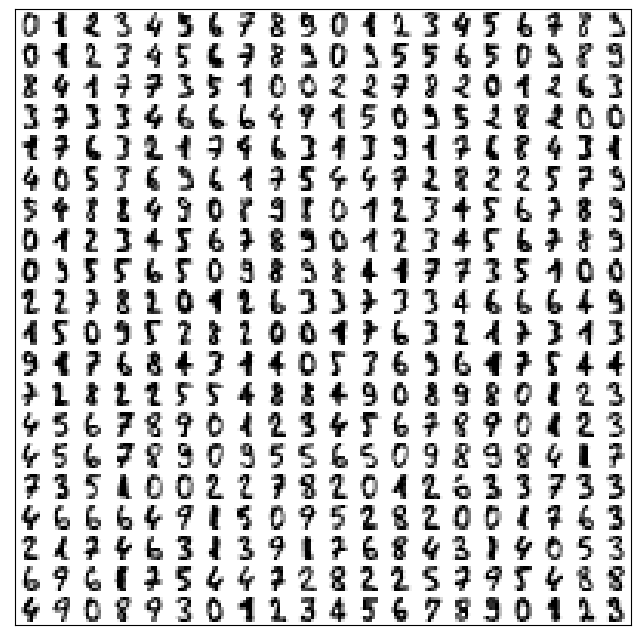

In [22]:
import numpy as np
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, manifold

# 加载 digits(MNIST) 数据集
n_class = 10
digits = datasets.load_digits(n_class=n_class)
data, target = digits.data, digits.target
n_samples, n_features = data.shape

# 显示 digits 数据集图像
n = 20  # 每行每列 20 个数字
image = np.zeros((10 * n, 10 * n))
for i in range(n):
    ix = 10 * i + 1
    for j in range(n):
        iy = 10 * j + 1
        image[ix:ix + 8, iy:iy + 8] = data[i * n + j].reshape((8, 8))
        
plot.figure(figsize=(8, 8))
plot.imshow(image, cmap=plot.cm.binary)
plot.xticks([])
plot.yticks([])
plot.show()

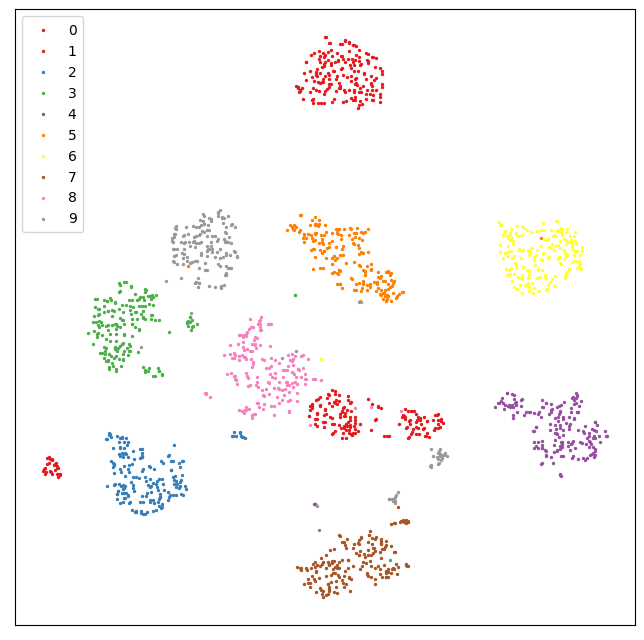

In [23]:

# 使用 t-SNE 进行二维可视化
# t-SNE 是一种非线性降维算法，非常适用于高维数据降维到 2 维或者 3 维，进行可视化
# 参考学习文章：https://blog.csdn.net/sinat_20177327/article/details/80298645
# 官网原始教程：https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne
# 可视化参数调整教程：https://distill.pub/2016/misread-tsne/
embedding = manifold.TSNE(  # 以下带 "-" 的参数为chang常设置值，其他的可以取默认值
    n_components=2,             # - 嵌入空间的维度，即降维后的维度
    perplexity=30,              # 混乱度，表示 t-SNE 优化过程中考虑临近点的多少，默认为 30
    early_exaggeration=12,      # 预先放大，表示嵌入空间簇间距的大小，默认为 12，值越大，可视化后的簇间距越大
    learning_rate=200,          # 学习率，表示梯度下降的快慢，默认为 200，建议取值在 10 到 1000 之间
    n_iter=1000,                # 迭代次数，默认为 1000，自定义设置时应保证大于 250
    min_grad_norm=1e-7,         # 最小梯度范数，默认为 1e-7，即梯度下降过程中，如果梯度范数小于该值，则停止迭代
    metric='euclidean',         # 距离度量，默认为 euclidean，可选值有 euclidean、manhattan、cosine、precomputed
    init='pca',                 # - 初始化，默认为random(随机初始化)，取值为 pca 为利用 PCA 进行初始化（常用），取值为 numpy 数组时必须 shape=(n_samples, n_components)
    verbose=0,                  # 日志级别，默认为 0，表示不输出日志信息。打印信息：近邻点数量、耗时、sigma、KL 散度、误差等
    random_state=0,             # - 随机数种子
    method='barnes_hut'         # 优化方法，默认为 barnes_hut，可选值有 exact、barnes_hut，第一种耗时 O(n^2)但是误差小，第二种耗时 O(nlogn)
)
x_embedding = embedding.fit_transform(data)

# 显示降维后的数据
x_min, x_max = x_embedding.min(0), x_embedding.max(0)
x_norm = (x_embedding - x_min) / (x_max - x_min)  # 显示范围归一化

# 创建表格
plot.figure(figsize=(8, 8))

# 绘制散点图
pos_groups = [[] for i in range(n_class)]
for i in range(n_samples):                  # 按类别分组
    pos_groups[target[i]].append(x_norm[i])
for i, pos_group in enumerate(pos_groups):  # 绘制每个类别的散点图
    x = [pos[0] for pos in pos_group]
    y = [pos[1] for pos in pos_group]
    plot.scatter(x=x, y=y, s=2,
                 color=plot.cm.Set1(target[i] / 10.),
                 label=str(target[i]))
plot.xticks([])
plot.yticks([])
plot.legend(loc='best',       # 图例位置
            scatterpoints=1,  # 图例显示方式
            frameon=True,     # 边框显示，默认为 False
            fancybox=True,    # 边框圆角，默认为 True
            borderpad=0.5)    # 边框距离，默认为 0.4
plot.show()

In [27]:

# 使用 t-SNE 进行三维可视化
embedding = manifold.TSNE(n_components=3, init='pca', random_state=0)
x_embedding = embedding.fit_transform(data)

# 显示降维后的数据
x_min, x_max = x_embedding.min(0), x_embedding.max(0)
x_norm = (x_embedding - x_min) / (x_max - x_min)  # 显示范围归一化

# 创建表格
fig = plot.figure(figsize=(8, 8))
ax = Axes3D(fig)

# 绘制散点图
pos_groups = [[] for i in range(n_class)]
for i in range(n_samples):                  # 按类别分组
    pos_groups[target[i]].append(x_norm[i])
for i, pos_group in enumerate(pos_groups):  # 绘制每个类别的散点图
    x = [pos[0] for pos in pos_group]
    y = [pos[1] for pos in pos_group]
    z = [pos[2] for pos in pos_group]
    ax.scatter(xs=x, ys=y, zs=z, s=2,
               color=plot.cm.Set1(target[i] / 10.))
# plot.axis("off")
plot.show()

<Figure size 800x800 with 0 Axes>